In [1]:
import os
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
p = Path("./sample/")

dirs = p.glob("*")

# Image data and labels
image_data = []
labels = []

# Mapping for Pokemons
labels_dict = {
    "Pikachu" : 0,
    "Bulbasaur" : 1,
    "Meowth" : 2
}
label_to_pokemon = {
    0 : "Pikachu",
    1 : "Bulbasaur",
    2 : "Meowth"
}

for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    
    count = 0
    print(folder_dir)
    
    # Iterate over each image in the folder and store the Image
    # Only .jpg images
    for img_path in folder_dir.glob("*.jpg"):
        
        # Reading the image (Keeping small size)
        img = image.load_img(img_path, target_size=(40,40))
        
        # Image -> Numpy array
        img = image.img_to_array(img)
        
        # Appending the image to the image data
        image_data.append(img)
        
        # Appending the corresponding label
        labels.append(labels_dict[label])
        
        count += 1
        
    print(label," : ",count)

sample\Bulbasaur
Bulbasaur  :  176
sample\Meowth
Meowth  :  70
sample\Pikachu
Pikachu  :  199


In [3]:
print(len(image_data))
print(len(labels))

445
445


In [4]:
# Converting the arrays to numpy array
# Images are RGB, therfore it will have 3 channels
X = np.array(image_data)
Y = np.array(labels)

In [5]:
print(X.shape)
print(Y.shape)

(445, 40, 40, 3)
(445,)


# Visualization of Pokemons

In [6]:
def drawImg(img, label):
    plt.imshow(img)
    plt.title(label_to_pokemon[label])
    plt.axis("off")
    plt.style.use('seaborn')
    plt.show()

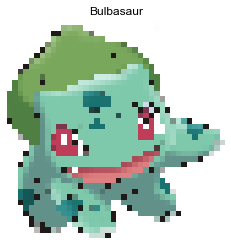

In [7]:
drawImg(X[0]/255.0, Y[0])

## Shuffling the data

In [8]:
from sklearn.utils import shuffle

X,Y = shuffle(X, Y, random_state=2)

# Normalisation
X = X/(255.0)


In [9]:
print(Y)

[0 2 0 0 2 1 0 0 1 2 0 2 1 0 0 1 1 0 0 2 1 1 2 2 2 0 0 0 1 0 2 0 1 1 1 0 1
 2 0 0 0 0 2 0 1 0 0 2 0 1 1 0 0 2 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 0 2 1 0 0 1 1 0 1 1 2 0 0 0 0 0 1 0 2 1 1 1 0 1 2 0 2 2 1 2 0 1 0 1
 1 2 1 1 0 0 2 1 0 1 0 1 1 2 0 1 2 1 2 0 2 0 0 1 0 0 0 1 1 0 0 2 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 0 0 1 2 1 2 0 1 2 1 2 0 0 1 2 2 1 1 0 0 2 1 1 0 0 1 1
 1 0 0 0 2 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 2 1 0 0 2 1 2 2 1 1 0 2 0 0 1 1
 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 2 0 2 1 2 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 2 1 2 1 0 1 0 1 0 0 2 2 0 0 2 0 1 1 0 0 0 1 1 1 1 0 0 0 2 0 1
 0 0 1 1 0 0 0 2 2 1 0 0 0 0 0 1 1 0 0 0 0 2 0 0 1 2 0 1 0 1 0 1 2 1 1 1 0
 0 2 2 1 2 0 0 0 1 1 0 1 2 0 2 0 1 1 0 1 2 0 2 0 0 0 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 2 1 0 0 0 2 0 1 0 1 2 0 0 1 1 2 1 1 1 1 2 0
 0 2 1 0 0 0 0 1 1 1 0 1 0 0 1 2 1 0 1 1 0 2 0 0 1 2 0 1 0 1 0 0 1 0 1 1 1
 1]


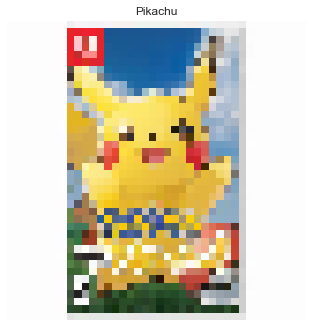

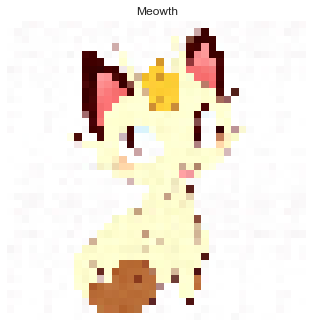

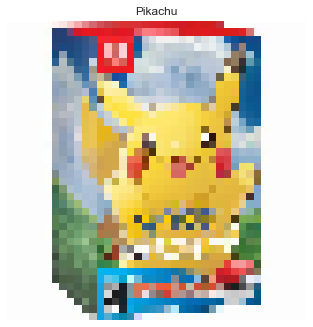

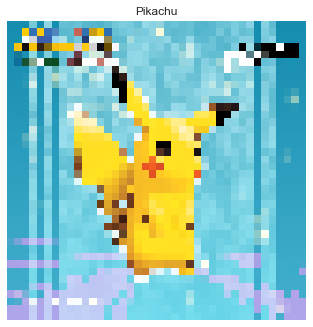

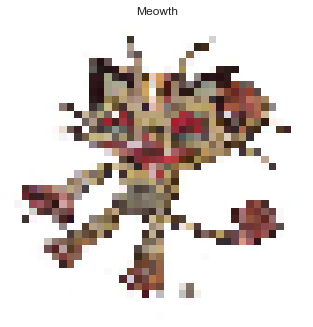

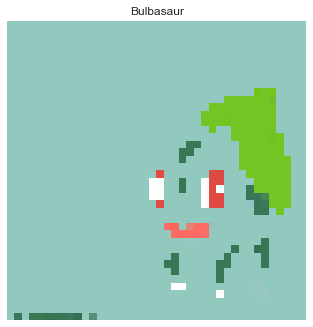

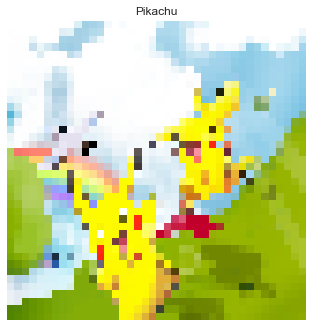

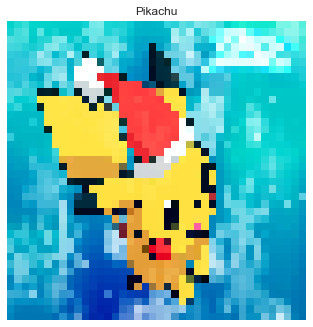

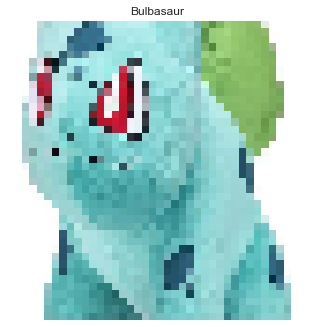

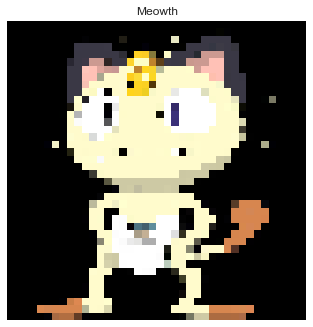

In [10]:
for i in range(10):
    drawImg(X[i],Y[i])

## Some Preprocessing

In [15]:
# Flattening the images
X = X.reshape((X.shape[0],-1))

# Train-Test split
split = 0.80 # 80% training
m = X.shape[0]

X_train = X[ : int(m*split), :]
Y_train = Y[ : int(m*split) ]
X_test  = X[int(m*split) : , :]
Y_test  = Y[int(m*split) : ]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(356, 4800) (356,)
(89, 4800) (89,)


# Neural Network Class

In [18]:
def softmax(a):
    e_pa = np.exp(a)
    # keepdims maintains the dimensionality
    return e_pa/np.sum(e_pa, axis=1, keepdims=True)

In [19]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        
        model = {}
        np.random.seed(0)
        
        # Random Initialisation of Weights for each layer
        
        # 1st Layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        # 2nd Layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        # Output Layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self, X):
        
        w1,w2,w3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        z1 = np.dot(X,w1) + b1
        a1 = np.tanh(z1) # Range (-1, 1)
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1, a2, y_)
        return y_
        
    def backward(self, x, y, learning_rate=0.001):
        
        w1,w2,w3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        
        a1, a2, y_ = self.activation_outputs
        m = x.shape[0]
        
        # Output Layer
        delta_3 = y_ - y
        dw3 = np.dot(a2.T, delta_3)
        db3 = np.sum(delta_3, axis=0)
        
        # derivative of the activation function : tanh(x) = 1 - (tanh(x))**2
        
        # 2nd Hidden Layer
        delta_2 = (1 - np.square(a2))*np.dot(delta_3, w3.T)
        dw2 = np.dot(a1.T, delta_2)
        db2 = np.sum(delta_2, axis=0)
        
        # 1st Hidden Layer
        delta_1 = (1 - np.square(a1))*np.dot(delta_2, w2.T)
        dw1 = np.dot(x.T, delta_1)
        db1 = np.sum(delta_1, axis=0)
        
        # Updating the model parameters using Gradient Descent
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
        
        
    def predict(self, x):
        
        # It will forward propagate our x
        y_out = self.forward(x)
        
        # After that, we will get the prob. dist. for each example as a col. vector
        # We will simply choose the class with the max. prob
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        
        # prints the shape of every parameter
        w1,w2,w3 = self.model['W1'], self.model['W2'], self.model['W3']
        b1,b2,b3 = self.model['b1'], self.model['b2'], self.model['b3']
        a1, a2, y_ = self.activation_outputs
        
        print("W1 : ", w1.shape)
        print("b1 : ", b1.shape)
        print("A1 : ", a1.shape)
        
        print("W2 : ", w2.shape)
        print("b2 : ", b2.shape)
        print("A2 : ", a2.shape)
        
        print("W3 : ", w3.shape)
        print("b3 : ", b3.shape)
        print("y_ : ", y_.shape)
        

In [20]:
def loss(y_oht, p):

    # Categorical Cross Entropy
    # y_oht : One hot Encoded Vector

    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, depth):

    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1

    return y_oht

In [26]:
def train(X, Y, model, epochs, learning_rate, logs=True):
    
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        
        # Forward 
        Y_ = model.forward(X)
        
        # Capturing the loss
        l = loss(Y_OHT, Y_)
        training_loss.append(l)
        
        # Backward Propagation
        model.backward(X, Y_OHT, learning_rate)
        
        # Logs for keeping track of the losses while training
        if logs == True and (ix + 1) % 50 == 0:
            print("Epoch : %d, Loss = %.4f"%(ix+1, l))
        
    return training_loss

## Model Training

In [29]:
model = NeuralNetwork(input_size=X_train.shape[1],
                      layers=[100, 50], 
                      output_size=3
                     )

In [30]:
losses = train(X_train, Y_train, model, epochs=500, learning_rate=0.0002)

Epoch : 50, Loss = 0.2669
Epoch : 100, Loss = 0.1444
Epoch : 150, Loss = 0.0952
Epoch : 200, Loss = 0.0881
Epoch : 250, Loss = 0.0580
Epoch : 300, Loss = 0.0463
Epoch : 350, Loss = 0.0401
Epoch : 400, Loss = 0.0352
Epoch : 450, Loss = 0.0319
Epoch : 500, Loss = 0.0294


# Plotting the Loss

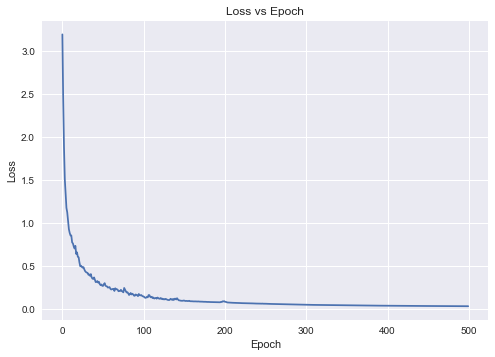

In [32]:
plt.plot(losses)
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## Accuracy

In [33]:
def getAccuracy(X, Y, model):
    output = model.predict(X)
    acc = (np.sum(output==Y)/Y.shape[0])*100
    return acc

### Clear Case of __Overfitting !!__

In [34]:
# Training Accuracy
acc_train = getAccuracy(X_train, Y_train, model)
acc_test = getAccuracy(X_test, Y_test, model)

print("Training Accuracy = ",acc_train)
print("Testing Accuracy = ",acc_test)


Training Accuracy =  99.43820224719101
Testing Accuracy =  64.04494382022472


# __Confusion Matrix__
### on training data

In [36]:
from sklearn.metrics import confusion_matrix
from visualize import plot_confusion_matrix

In [38]:
Y_pred = model.predict(X_train)
cnf_matrix = confusion_matrix(Y_train, Y_pred)
print(cnf_matrix)

[[160   0   0]
 [  0 134   1]
 [  1   0  60]]


Confusion matrix, without normalization
[[160   0   0]
 [  0 134   1]
 [  1   0  60]]


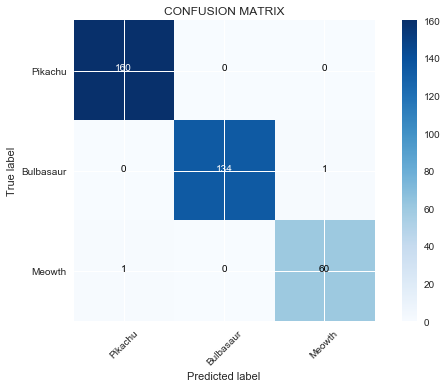

In [41]:
plot_confusion_matrix(cnf_matrix, classes=list(labels_dict.keys()), title="CONFUSION MATRIX")

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(Y_train, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       160
           1       1.00      0.99      1.00       135
           2       0.98      0.98      0.98        61

    accuracy                           0.99       356
   macro avg       0.99      0.99      0.99       356
weighted avg       0.99      0.99      0.99       356



# __Confusion Matrix__
### on testing data

In [44]:
Yt_pred = model.predict(X_test)
cnf_test_matrix = confusion_matrix(Y_test, Yt_pred)
print(cnf_test_matrix)

[[30  7  2]
 [11 26  4]
 [ 5  3  1]]


Confusion matrix, without normalization
[[30  7  2]
 [11 26  4]
 [ 5  3  1]]


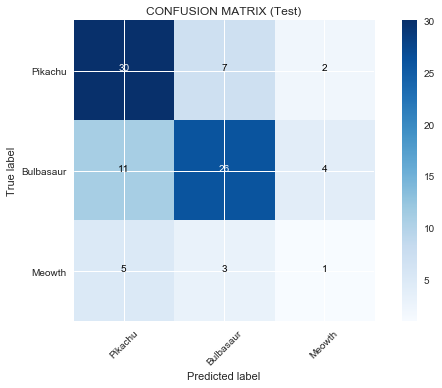

In [45]:
plot_confusion_matrix(cnf_test_matrix, classes=list(labels_dict.keys()), title="CONFUSION MATRIX (Test)")